<a href="https://colab.research.google.com/github/rushi-k12/chatbot/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import random
import numpy as np
import string
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import re,string
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,LayerNormalization
import pickle


In [13]:
# prompt: some intents examples for a nlp chatbot atleast 10

intents = {
    'greeting': {
        'examples': ['hello', 'hi', 'hey', 'howdy'],
        'responses': ['Hello!', 'Hi there!', 'Hey! How can I help you?']
    },
    'goodbye': {
        'examples': ['bye', 'goodbye', 'see you'],
        'responses': ['Goodbye!', 'See you later!', 'Take care!']
    },
    'thanks': {
        'examples': ['thank you', 'thanks', 'appreciate it'],
        'responses': ['You are welcome!', 'No problem!', 'I am glad I could help!']
    },
    'apology': {
        'examples': ['sorry', 'apologize', 'my bad'],
        'responses': ['It is okay!', 'No problem!', 'Do not worry about it!']
    },
    'yes': {
        'examples': ['yes', 'yeah', 'yup'],
        'responses': ['Great!', 'Awesome!', 'Sounds good!']
    },
    'no': {
        'examples': ['no', 'nope', 'nah'],
        'responses': ['Okay.', 'No problem.', 'I understand.']
    },
     'statement': {
        'examples': ['I am feeling good', 'I am feeling bad', 'I am bored', 'I am excited'],
        'responses': ['That is great to hear!', 'I am sorry to hear that.', 'Find something to do!']
     },
    'help': {
        'examples': ['help', 'can you help me', 'i need help', 'what can you do'],
        'responses': ['I can help you with a variety of things. What can I help you with today?']
    },
    'search': {
        'examples': ['search for', 'find', 'i want to find', 'i want to search for'],
        'responses': ['Sure, what do you want to search for?']
    },
    'confusion': {
        'examples': ['I do not understand', 'what do you mean?', 'can you explain that again?'],
        'responses': ['I will try to explain it differently.', 'Let me clarify that for you.', 'Sure, I can explain again.']
    },
    # Add more intents as needed
}


In [1]:
!unzip /content/nlp.zip

Archive:  /content/nlp.zip
  inflating: dialogs.txt             


In [17]:
# prompt: how to load a txt dataset

data = []
with open('dialogs.txt', 'r') as f:
  for line in f:
    data.append(line.strip())


In [18]:
data

["hi, how are you doing?\ti'm fine. how about yourself?",
 "i'm fine. how about yourself?\ti'm pretty good. thanks for asking.",
 "i'm pretty good. thanks for asking.\tno problem. so how have you been?",
 "no problem. so how have you been?\ti've been great. what about you?",
 "i've been great. what about you?\ti've been good. i'm in school right now.",
 "i've been good. i'm in school right now.\twhat school do you go to?",
 'what school do you go to?\ti go to pcc.',
 'i go to pcc.\tdo you like it there?',
 "do you like it there?\tit's okay. it's a really big campus.",
 "it's okay. it's a really big campus.\tgood luck with school.",
 'good luck with school.\tthank you very much.',
 "how's it going?\ti'm doing well. how about you?",
 "i'm doing well. how about you?\tnever better, thanks.",
 'never better, thanks.\tso how have you been lately?',
 "so how have you been lately?\ti've actually been pretty good. you?",
 "i've actually been pretty good. you?\ti'm actually in school right now."

In [19]:
# prompt: my dataset is in txt form, how to convert it to csv

import csv

with open('dialogs.txt', 'r') as f:
  with open('dialogs.csv', 'w') as f2:
    writer = csv.writer(f2)
    for line in f:
      writer.writerow(line.split())


In [20]:
data

["hi, how are you doing?\ti'm fine. how about yourself?",
 "i'm fine. how about yourself?\ti'm pretty good. thanks for asking.",
 "i'm pretty good. thanks for asking.\tno problem. so how have you been?",
 "no problem. so how have you been?\ti've been great. what about you?",
 "i've been great. what about you?\ti've been good. i'm in school right now.",
 "i've been good. i'm in school right now.\twhat school do you go to?",
 'what school do you go to?\ti go to pcc.',
 'i go to pcc.\tdo you like it there?',
 "do you like it there?\tit's okay. it's a really big campus.",
 "it's okay. it's a really big campus.\tgood luck with school.",
 'good luck with school.\tthank you very much.',
 "how's it going?\ti'm doing well. how about you?",
 "i'm doing well. how about you?\tnever better, thanks.",
 'never better, thanks.\tso how have you been lately?',
 "so how have you been lately?\ti've actually been pretty good. you?",
 "i've actually been pretty good. you?\ti'm actually in school right now."

In [3]:
df=pd.read_csv('/content/dialogs.txt',sep='\t',names=['Questions','Answers'])
df


,Questions,Answers
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [4]:
a = pd.Series(df.columns)
df

,Questions,Answers
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [5]:
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]


In [6]:
Pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=cleaner)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [7]:
Pipe.fit(df['Questions'],df['Answers'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x7aba5d389fc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [9]:
Pipe.predict(['great'])[0]

'i appreciate that.'

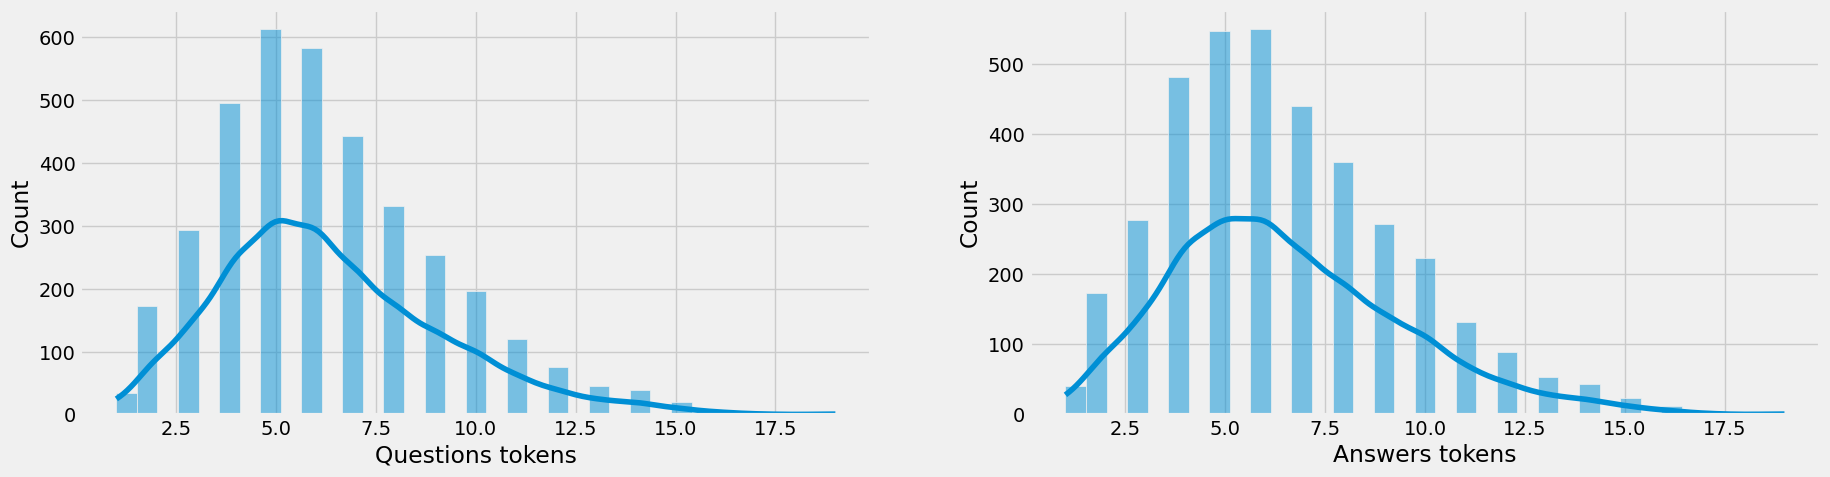

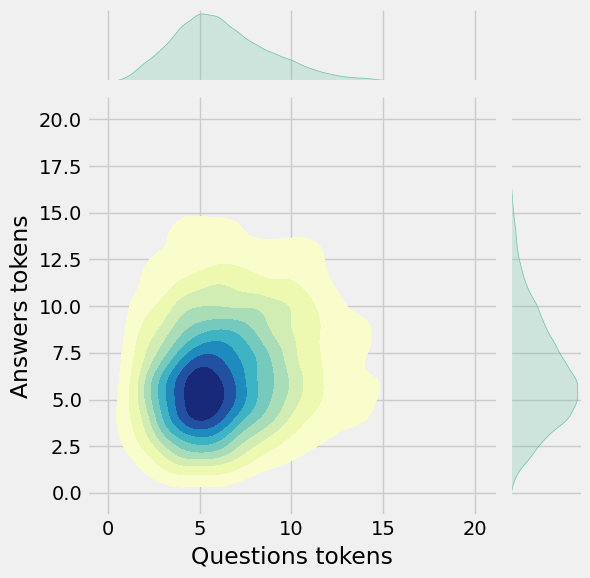

In [10]:
df['Questions tokens']=df['Questions'].apply(lambda x:len(x.split()))
df['Answers tokens']=df['Answers'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['Questions tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['Answers tokens'],data=df,kde=True,ax=ax[1])
sns.jointplot(x='Questions tokens',y='Answers tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

In [11]:
def clean_text(text):
    text=re.sub('-',' ',text.lower())
    text=re.sub('[.]',' . ',text)
    text=re.sub('[1]',' 1 ',text)
    text=re.sub('[2]',' 2 ',text)
    text=re.sub('[3]',' 3 ',text)
    text=re.sub('[4]',' 4 ',text)
    text=re.sub('[5]',' 5 ',text)
    text=re.sub('[6]',' 6 ',text)
    text=re.sub('[7]',' 7 ',text)
    text=re.sub('[8]',' 8 ',text)
    text=re.sub('[9]',' 9 ',text)
    text=re.sub('[0]',' 0 ',text)
    text=re.sub('[,]',' , ',text)
    text=re.sub('[?]',' ? ',text)
    text=re.sub('[!]',' ! ',text)
    text=re.sub('[$]',' $ ',text)
    text=re.sub('[&]',' & ',text)
    text=re.sub('[/]',' / ',text)
    text=re.sub('[:]',' : ',text)
    text=re.sub('[;]',' ; ',text)
    text=re.sub('[*]',' * ',text)
    text=re.sub('[\']',' \' ',text)
    text=re.sub('[\"]',' \" ',text)
    text=re.sub('\t',' ',text)
    return text


df['encoder_inputs'] = df['Questions'].apply(clean_text)
df['decoder_targets'] = df['Answers'].apply(clean_text) + ' <end>'
df['decoder_inputs'] = '<start> ' + df['Answers'].apply(clean_text) + ' <end>'

df.head(10)

,Questions,Answers,Questions tokens,Answers tokens,encoder_inputs,decoder_targets,decoder_inputs
0,"hi, how are you doing?",i'm fine. how about yourself?,5,5,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,5,6,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,6,7,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,no problem. so how have you been?,i've been great. what about you?,7,6,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,i've been great. what about you?,i've been good. i'm in school right now.,6,8,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,i've been good. i'm in school right now.,what school do you go to?,8,6,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,what school do you go to?,i go to pcc.,6,4,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,i go to pcc.,do you like it there?,4,5,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,do you like it there?,it's okay. it's a really big campus.,5,7,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,it's okay. it's a really big campus.,good luck with school.,7,4,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


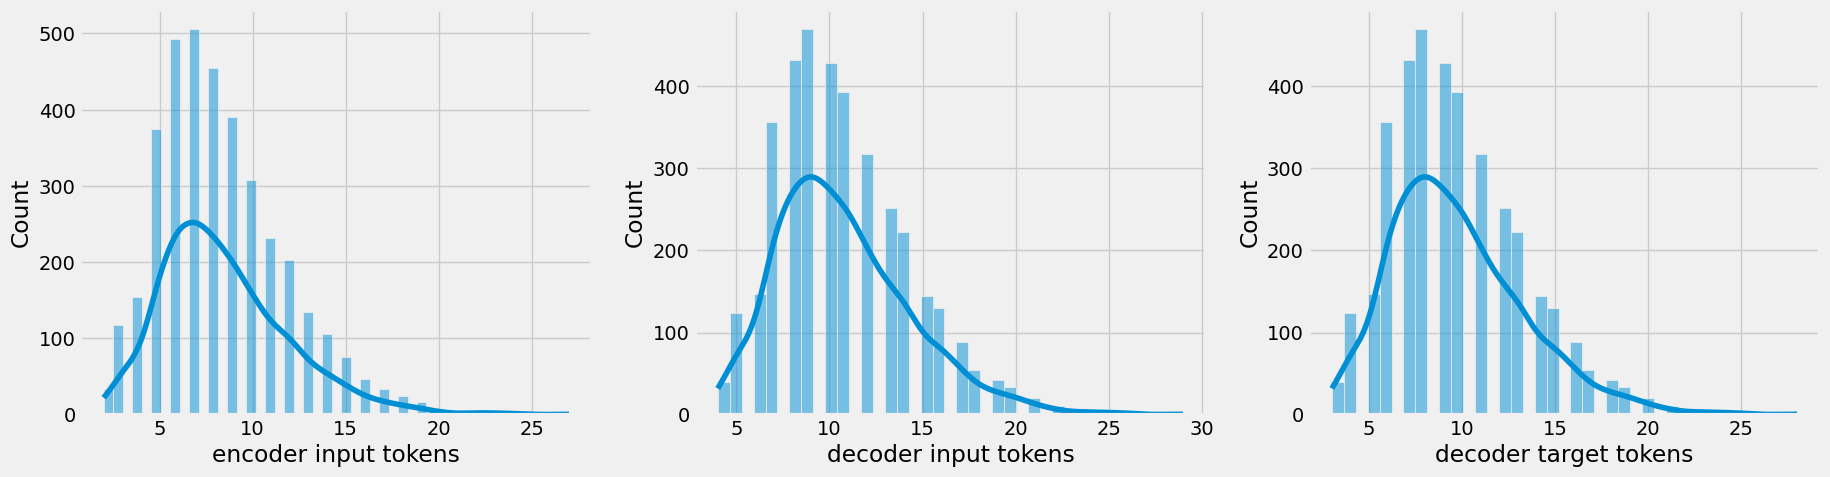

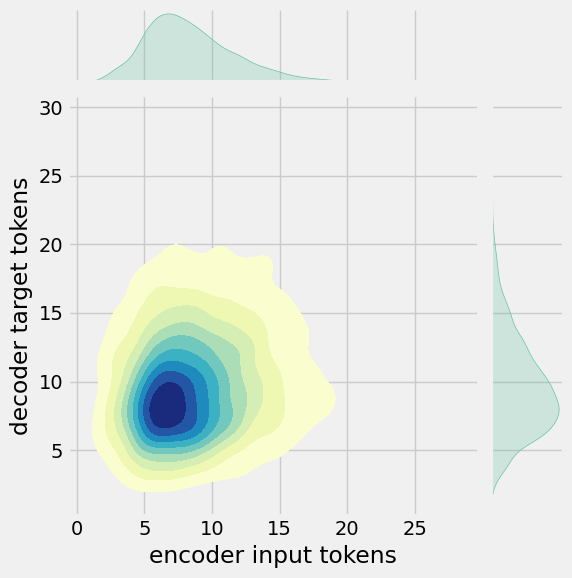

In [12]:
df['encoder input tokens']=df['encoder_inputs'].apply(lambda x:len(x.split()))
df['decoder input tokens']=df['decoder_inputs'].apply(lambda x:len(x.split()))
df['decoder target tokens']=df['decoder_targets'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['encoder input tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['decoder input tokens'],data=df,kde=True,ax=ax[1])
sns.histplot(x=df['decoder target tokens'],data=df,kde=True,ax=ax[2])
sns.jointplot(x='encoder input tokens',y='decoder target tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

In [13]:
print(f"After preprocessing: {' '.join(df[df['encoder input tokens'].max()==df['encoder input tokens']]['encoder_inputs'].values.tolist())}")
print(f"Max encoder input length: {df['encoder input tokens'].max()}")
print(f"Max decoder input length: {df['decoder input tokens'].max()}")
print(f"Max decoder target length: {df['decoder target tokens'].max()}")

df.drop(columns=['Questions','Answers','encoder input tokens','decoder input tokens','decoder target tokens'],axis=1,inplace=True)
params={
    "vocab_size":2500,
    "max_sequence_length":30,
    "learning_rate":0.008,
    "batch_size":149,
    "lstm_cells":256,
    "embedding_dim":256,
    "buffer_size":10000
}
learning_rate=params['learning_rate']
batch_size=params['batch_size']
embedding_dim=params['embedding_dim']
lstm_cells=params['lstm_cells']
vocab_size=params['vocab_size']
buffer_size=params['buffer_size']
max_sequence_length=params['max_sequence_length']
df.head(10)

After preprocessing: for example ,  if your birth date is january  1  2  ,   1  9  8  7  ,  write  0  1  /  1  2  /  8  7  . 
Max encoder input length: 27
Max decoder input length: 29
Max decoder target length: 28


,Questions tokens,Answers tokens,encoder_inputs,decoder_targets,decoder_inputs
0,5,5,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,5,6,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,6,7,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,7,6,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,6,8,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,8,6,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,6,4,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,4,5,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,5,7,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,7,4,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


In [14]:
vectorize_layer=TextVectorization(
    max_tokens=vocab_size,
    standardize=None,
    output_mode='int',
    output_sequence_length=max_sequence_length
)
vectorize_layer.adapt(df['encoder_inputs']+' '+df['decoder_targets']+' <start> <end>')
vocab_size=len(vectorize_layer.get_vocabulary())
print(f'Vocab size: {len(vectorize_layer.get_vocabulary())}')
print(f'{vectorize_layer.get_vocabulary()[:12]}')

Vocab size: 2443
['', '[UNK]', '<end>', '.', '<start>', "'", 'i', '?', 'you', ',', 'the', 'to']


In [15]:
def sequences2ids(sequence):
    return vectorize_layer(sequence)

def ids2sequences(ids):
    decode=''
    if type(ids)==int:
        ids=[ids]
    for id in ids:
        decode+=vectorize_layer.get_vocabulary()[id]+' '
    return decode

x=sequences2ids(df['encoder_inputs'])
yd=sequences2ids(df['decoder_inputs'])
y=sequences2ids(df['decoder_targets'])

print(f'Question sentence: hi , how are you ?')
print(f'Question to tokens: {sequences2ids("hi , how are you ?")[:10]}')
print(f'Encoder input shape: {x.shape}')
print(f'Decoder input shape: {yd.shape}')
print(f'Decoder target shape: {y.shape}')

Question sentence: hi , how are you ?
Question to tokens: [1971    9   45   24    8    7    0    0    0    0]
Encoder input shape: (3725, 30)
Decoder input shape: (3725, 30)
Decoder target shape: (3725, 30)


In [16]:
data=tf.data.Dataset.from_tensor_slices((x,yd,y))
data=data.shuffle(buffer_size)

train_data=data.take(int(.9*len(data)))
train_data=train_data.cache()
train_data=train_data.shuffle(buffer_size)
train_data=train_data.batch(batch_size)
train_data=train_data.prefetch(tf.data.AUTOTUNE)
train_data_iterator=train_data.as_numpy_iterator()

val_data=data.skip(int(.9*len(data))).take(int(.1*len(data)))
val_data=val_data.batch(batch_size)
val_data=val_data.prefetch(tf.data.AUTOTUNE)

_=train_data_iterator.next()
print(f'Number of train batches: {len(train_data)}')
print(f'Number of training data: {len(train_data)*batch_size}')
print(f'Number of validation batches: {len(val_data)}')
print(f'Number of validation data: {len(val_data)*batch_size}')
print(f'Encoder Input shape (with batches): {_[0].shape}')
print(f'Decoder Input shape (with batches): {_[1].shape}')
print(f'Target Output shape (with batches): {_[2].shape}')

Number of train batches: 23
Number of training data: 3427
Number of validation batches: 3
Number of validation data: 447
Encoder Input shape (with batches): (149, 30)
Decoder Input shape (with batches): (149, 30)
Target Output shape (with batches): (149, 30)


In [17]:
class Encoder(tf.keras.models.Model):
    def __init__(self,units,embedding_dim,vocab_size,*args,**kwargs) -> None:
        super().__init__(*args,**kwargs)
        self.units=units
        self.vocab_size=vocab_size
        self.embedding_dim=embedding_dim
        self.embedding=Embedding(
            vocab_size,
            embedding_dim,
            name='encoder_embedding',
            mask_zero=True,
            embeddings_initializer=tf.keras.initializers.GlorotNormal()
        )
        self.normalize=LayerNormalization()
        self.lstm=LSTM(
            units,
            dropout=.4,
            return_state=True,
            return_sequences=True,
            name='encoder_lstm',
            kernel_initializer=tf.keras.initializers.GlorotNormal()
        )

    def call(self,encoder_inputs):
        self.inputs=encoder_inputs
        x=self.embedding(encoder_inputs)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        encoder_outputs,encoder_state_h,encoder_state_c=self.lstm(x)
        self.outputs=[encoder_state_h,encoder_state_c]
        return encoder_state_h,encoder_state_c

encoder=Encoder(lstm_cells,embedding_dim,vocab_size,name='encoder')
encoder.call(_[0])

(<tf.Tensor: shape=(149, 256), dtype=float32, numpy=
 array([[ 1.21581288e-04,  1.77182093e-01,  5.21536209e-02, ...,
         -1.66772798e-01,  1.67226307e-02, -1.43634453e-02],
        [-3.30955572e-02, -1.04862034e-01,  1.23821180e-02, ...,
         -1.82628542e-01,  2.25848675e-01, -1.95110440e-01],
        [ 7.62626603e-02,  1.32907957e-01, -1.61269128e-01, ...,
         -1.05985023e-01, -1.02631167e-01,  6.67144284e-02],
        ...,
        [ 8.80806446e-02, -1.43361628e-01, -1.79606825e-01, ...,
         -2.33507439e-01, -1.93799898e-01, -2.39750315e-02],
        [-7.78862908e-02,  1.22045904e-01, -1.22161545e-01, ...,
          4.74947430e-02, -1.24156050e-01, -2.61228859e-01],
        [-5.33799380e-02,  5.01528010e-02, -3.33920158e-02, ...,
         -1.01403266e-01, -1.70969784e-01,  4.15100455e-02]], dtype=float32)>,
 <tf.Tensor: shape=(149, 256), dtype=float32, numpy=
 array([[ 2.26072967e-04,  4.33321416e-01,  8.89439359e-02, ...,
         -3.39831024e-01,  2.82110721e-02,

In [18]:
class Decoder(tf.keras.models.Model):
    def __init__(self,units,embedding_dim,vocab_size,*args,**kwargs) -> None:
        super().__init__(*args,**kwargs)
        self.units=units
        self.embedding_dim=embedding_dim
        self.vocab_size=vocab_size
        self.embedding=Embedding(
            vocab_size,
            embedding_dim,
            name='decoder_embedding',
            mask_zero=True,
            embeddings_initializer=tf.keras.initializers.HeNormal()
        )
        self.normalize=LayerNormalization()
        self.lstm=LSTM(
            units,
            dropout=.4,
            return_state=True,
            return_sequences=True,
            name='decoder_lstm',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
        self.fc=Dense(
            vocab_size,
            activation='softmax',
            name='decoder_dense',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )

    def call(self,decoder_inputs,encoder_states):
        x=self.embedding(decoder_inputs)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        x,decoder_state_h,decoder_state_c=self.lstm(x,initial_state=encoder_states)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        return self.fc(x)

decoder=Decoder(lstm_cells,embedding_dim,vocab_size,name='decoder')
decoder(_[1][:1],encoder(_[0][:1]))

<tf.Tensor: shape=(1, 30, 2443), dtype=float32, numpy=
array([[[3.8000671e-05, 1.2285182e-04, 1.4525729e-05, ...,
         3.1925443e-05, 5.2926618e-05, 3.1139579e-04],
        [3.2951240e-05, 4.5998462e-05, 3.3381417e-05, ...,
         4.0520110e-05, 5.3476910e-05, 6.3123973e-04],
        [3.5213522e-04, 1.0749751e-04, 3.6205012e-05, ...,
         9.0747322e-05, 1.0552454e-04, 2.5061923e-03],
        ...,
        [1.5650947e-04, 3.8887243e-04, 9.2161739e-05, ...,
         7.7691155e-05, 1.1293906e-04, 1.3611357e-04],
        [1.5650947e-04, 3.8887243e-04, 9.2161739e-05, ...,
         7.7691155e-05, 1.1293906e-04, 1.3611357e-04],
        [1.5650947e-04, 3.8887243e-04, 9.2161739e-05, ...,
         7.7691155e-05, 1.1293906e-04, 1.3611357e-04]]], dtype=float32)>

In [19]:
class ChatBotTrainer(tf.keras.models.Model):
    def __init__(self,encoder,decoder,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.encoder=encoder
        self.decoder=decoder

    def loss_fn(self,y_true,y_pred):
        loss=self.loss(y_true,y_pred)
        mask=tf.math.logical_not(tf.math.equal(y_true,0))
        mask=tf.cast(mask,dtype=loss.dtype)
        loss*=mask
        return tf.reduce_mean(loss)

    def accuracy_fn(self,y_true,y_pred):
        pred_values = tf.cast(tf.argmax(y_pred, axis=-1), dtype='int64')
        correct = tf.cast(tf.equal(y_true, pred_values), dtype='float64')
        mask = tf.cast(tf.greater(y_true, 0), dtype='float64')
        n_correct = tf.keras.backend.sum(mask * correct)
        n_total = tf.keras.backend.sum(mask)
        return n_correct / n_total

    def call(self,inputs):
        encoder_inputs,decoder_inputs=inputs
        encoder_states=self.encoder(encoder_inputs)
        return self.decoder(decoder_inputs,encoder_states)

    def train_step(self,batch):
        encoder_inputs,decoder_inputs,y=batch
        with tf.GradientTape() as tape:
            encoder_states=self.encoder(encoder_inputs,training=True)
            y_pred=self.decoder(decoder_inputs,encoder_states,training=True)
            loss=self.loss_fn(y,y_pred)
            acc=self.accuracy_fn(y,y_pred)

        variables=self.encoder.trainable_variables+self.decoder.trainable_variables
        grads=tape.gradient(loss,variables)
        self.optimizer.apply_gradients(zip(grads,variables))
        metrics={'loss':loss,'accuracy':acc}
        return metrics

    def test_step(self,batch):
        encoder_inputs,decoder_inputs,y=batch
        encoder_states=self.encoder(encoder_inputs,training=True)
        y_pred=self.decoder(decoder_inputs,encoder_states,training=True)
        loss=self.loss_fn(y,y_pred)
        acc=self.accuracy_fn(y,y_pred)
        metrics={'loss':loss,'accuracy':acc}
        return metrics

In [20]:
model=ChatBotTrainer(encoder,decoder,name='chatbot_trainer')
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    weighted_metrics=['loss','accuracy']
)
model(_[:2])

<tf.Tensor: shape=(149, 30, 2443), dtype=float32, numpy=
array([[[3.80006932e-05, 1.22851896e-04, 1.45257309e-05, ...,
         3.19254614e-05, 5.29266254e-05, 3.11395794e-04],
        [3.29512368e-05, 4.59984803e-05, 3.33814132e-05, ...,
         4.05201426e-05, 5.34768478e-05, 6.31239964e-04],
        [3.52135015e-04, 1.07497588e-04, 3.62050523e-05, ...,
         9.07473805e-05, 1.05524559e-04, 2.50619184e-03],
        ...,
        [1.56509515e-04, 3.88872548e-04, 9.21617611e-05, ...,
         7.76912566e-05, 1.12939197e-04, 1.36113609e-04],
        [1.56509515e-04, 3.88872548e-04, 9.21617611e-05, ...,
         7.76912566e-05, 1.12939197e-04, 1.36113609e-04],
        [1.56509515e-04, 3.88872548e-04, 9.21617611e-05, ...,
         7.76912566e-05, 1.12939197e-04, 1.36113609e-04]],

       [[1.11779045e-04, 7.96567329e-05, 2.66467483e-04, ...,
         3.00366723e-04, 3.33963981e-05, 2.31440106e-04],
        [3.91374488e-04, 4.12789814e-05, 1.90468403e-04, ...,
         1.45080819e-04, 2

In [22]:
history = model.fit(train_data,
                    epochs=100,
                    validation_data=val_data,
                    callbacks=[tf.keras.callbacks.TensorBoard(log_dir = 'logs') ,
                               tf.keras.callbacks.ModelCheckpoint('ckpt' , verbose=1, save_best_only=True)])

Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 1.6525 - accuracy: 0.2213
Epoch 1: val_loss improved from inf to 1.40638, saving model to ckpt


23/23 [==============================] - 81s 3s/step - loss: 1.6395 - accuracy: 0.2251 - val_loss: 1.4064 - val_accuracy: 0.2870
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.3111
Epoch 2: val_loss improved from 1.40638 to 1.08121, saving model to ckpt


23/23 [==============================] - 62s 3s/step - loss: 1.2333 - accuracy: 0.3110 - val_loss: 1.0812 - val_accuracy: 0.3389
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.3371
Epoch 3: val_loss did not improve from 1.08121
23/23 [==============================] - 40s 2s/step - loss: 1.0952 - accuracy: 0.3372 - val_loss: 1.0890 - val_accuracy: 0.3417
Epoch 4/100
23/23 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.3567
Epoch 4: val_loss improved from 1.08121 to 0.89348, saving model to ckpt


23/23 [==============================] - 60s 3s/step - loss: 1.0251 - accuracy: 0.3572 - val_loss: 0.8935 - val_accuracy: 0.3715
Epoch 5/100
23/23 [==============================] - ETA: 0s - loss: 0.9643 - accuracy: 0.3685
Epoch 5: val_loss did not improve from 0.89348
23/23 [==============================] - 41s 2s/step - loss: 0.9658 - accuracy: 0.3676 - val_loss: 0.9117 - val_accuracy: 0.3922
Epoch 6/100
23/23 [==============================] - ETA: 0s - loss: 0.9091 - accuracy: 0.3832
Epoch 6: val_loss improved from 0.89348 to 0.88028, saving model to ckpt


23/23 [==============================] - 63s 3s/step - loss: 0.9088 - accuracy: 0.3833 - val_loss: 0.8803 - val_accuracy: 0.3980
Epoch 7/100
23/23 [==============================] - ETA: 0s - loss: 0.8715 - accuracy: 0.3938
Epoch 7: val_loss improved from 0.88028 to 0.86789, saving model to ckpt


23/23 [==============================] - 62s 3s/step - loss: 0.8710 - accuracy: 0.3931 - val_loss: 0.8679 - val_accuracy: 0.4111
Epoch 8/100
23/23 [==============================] - ETA: 0s - loss: 0.8400 - accuracy: 0.4015
Epoch 8: val_loss did not improve from 0.86789
23/23 [==============================] - 40s 2s/step - loss: 0.8396 - accuracy: 0.4018 - val_loss: 0.8947 - val_accuracy: 0.4077
Epoch 9/100
23/23 [==============================] - ETA: 0s - loss: 0.8099 - accuracy: 0.4131
Epoch 9: val_loss improved from 0.86789 to 0.77867, saving model to ckpt


23/23 [==============================] - 62s 3s/step - loss: 0.8091 - accuracy: 0.4138 - val_loss: 0.7787 - val_accuracy: 0.3897
Epoch 10/100
23/23 [==============================] - ETA: 0s - loss: 0.7875 - accuracy: 0.4192
Epoch 10: val_loss did not improve from 0.77867
23/23 [==============================] - 42s 2s/step - loss: 0.7900 - accuracy: 0.4195 - val_loss: 0.8148 - val_accuracy: 0.4342
Epoch 11/100
23/23 [==============================] - ETA: 0s - loss: 0.7667 - accuracy: 0.4270
Epoch 11: val_loss improved from 0.77867 to 0.76777, saving model to ckpt


23/23 [==============================] - 63s 3s/step - loss: 0.7723 - accuracy: 0.4251 - val_loss: 0.7678 - val_accuracy: 0.4494
Epoch 12/100
23/23 [==============================] - ETA: 0s - loss: 0.7459 - accuracy: 0.4377
Epoch 12: val_loss improved from 0.76777 to 0.70182, saving model to ckpt


23/23 [==============================] - 61s 3s/step - loss: 0.7477 - accuracy: 0.4375 - val_loss: 0.7018 - val_accuracy: 0.4433
Epoch 13/100
23/23 [==============================] - ETA: 0s - loss: 0.7239 - accuracy: 0.4459
Epoch 13: val_loss improved from 0.70182 to 0.68601, saving model to ckpt


23/23 [==============================] - 61s 3s/step - loss: 0.7270 - accuracy: 0.4450 - val_loss: 0.6860 - val_accuracy: 0.4583
Epoch 14/100
23/23 [==============================] - ETA: 0s - loss: 0.7026 - accuracy: 0.4542
Epoch 14: val_loss did not improve from 0.68601
23/23 [==============================] - 40s 2s/step - loss: 0.7025 - accuracy: 0.4532 - val_loss: 0.8327 - val_accuracy: 0.4498
Epoch 15/100
23/23 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.4595
Epoch 15: val_loss improved from 0.68601 to 0.60768, saving model to ckpt


23/23 [==============================] - 61s 3s/step - loss: 0.6909 - accuracy: 0.4588 - val_loss: 0.6077 - val_accuracy: 0.4992
Epoch 16/100
23/23 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.4693
Epoch 16: val_loss did not improve from 0.60768
23/23 [==============================] - 40s 2s/step - loss: 0.6797 - accuracy: 0.4676 - val_loss: 0.6706 - val_accuracy: 0.5079
Epoch 17/100
23/23 [==============================] - ETA: 0s - loss: 0.6586 - accuracy: 0.4765
Epoch 17: val_loss did not improve from 0.60768
23/23 [==============================] - 39s 2s/step - loss: 0.6581 - accuracy: 0.4762 - val_loss: 0.6665 - val_accuracy: 0.4805
Epoch 18/100
23/23 [==============================] - ETA: 0s - loss: 0.6458 - accuracy: 0.4816
Epoch 18: val_loss improved from 0.60768 to 0.59691, saving model to ckpt


23/23 [==============================] - 60s 3s/step - loss: 0.6458 - accuracy: 0.4818 - val_loss: 0.5969 - val_accuracy: 0.5007
Epoch 19/100
23/23 [==============================] - ETA: 0s - loss: 0.6359 - accuracy: 0.4815
Epoch 19: val_loss did not improve from 0.59691
23/23 [==============================] - 39s 2s/step - loss: 0.6344 - accuracy: 0.4819 - val_loss: 0.6750 - val_accuracy: 0.4635
Epoch 20/100
23/23 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.4926
Epoch 20: val_loss did not improve from 0.59691
23/23 [==============================] - 38s 2s/step - loss: 0.6239 - accuracy: 0.4928 - val_loss: 0.6372 - val_accuracy: 0.5042
Epoch 21/100
23/23 [==============================] - ETA: 0s - loss: 0.6098 - accuracy: 0.5025
Epoch 21: val_loss did not improve from 0.59691
23/23 [==============================] - 41s 2s/step - loss: 0.6102 - accuracy: 0.5024 - val_loss: 0.6667 - val_accuracy: 0.5249
Epoch 22/100
23/23 [==============================] 

23/23 [==============================] - 61s 3s/step - loss: 0.5713 - accuracy: 0.5217 - val_loss: 0.5878 - val_accuracy: 0.5396
Epoch 26/100
23/23 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.5257
Epoch 26: val_loss did not improve from 0.58782
23/23 [==============================] - 40s 2s/step - loss: 0.5714 - accuracy: 0.5246 - val_loss: 0.6394 - val_accuracy: 0.5289
Epoch 27/100
23/23 [==============================] - ETA: 0s - loss: 0.5599 - accuracy: 0.5282
Epoch 27: val_loss improved from 0.58782 to 0.56302, saving model to ckpt


23/23 [==============================] - 61s 3s/step - loss: 0.5618 - accuracy: 0.5276 - val_loss: 0.5630 - val_accuracy: 0.5094
Epoch 28/100
23/23 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.5352
Epoch 28: val_loss did not improve from 0.56302
23/23 [==============================] - 40s 2s/step - loss: 0.5531 - accuracy: 0.5341 - val_loss: 0.6141 - val_accuracy: 0.4966
Epoch 29/100
23/23 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.5432
Epoch 29: val_loss did not improve from 0.56302
23/23 [==============================] - 40s 2s/step - loss: 0.5435 - accuracy: 0.5433 - val_loss: 0.6042 - val_accuracy: 0.5471
Epoch 30/100
23/23 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.5415
Epoch 30: val_loss did not improve from 0.56302
23/23 [==============================] - 39s 2s/step - loss: 0.5400 - accuracy: 0.5409 - val_loss: 0.6279 - val_accuracy: 0.5353
Epoch 31/100
23/23 [==============================] 

23/23 [==============================] - 60s 3s/step - loss: 0.5188 - accuracy: 0.5519 - val_loss: 0.5509 - val_accuracy: 0.5708
Epoch 34/100
23/23 [==============================] - ETA: 0s - loss: 0.5116 - accuracy: 0.5570
Epoch 34: val_loss did not improve from 0.55088
23/23 [==============================] - 41s 2s/step - loss: 0.5120 - accuracy: 0.5573 - val_loss: 0.6138 - val_accuracy: 0.5413
Epoch 35/100
23/23 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.5638
Epoch 35: val_loss improved from 0.55088 to 0.55022, saving model to ckpt


23/23 [==============================] - 60s 3s/step - loss: 0.5045 - accuracy: 0.5632 - val_loss: 0.5502 - val_accuracy: 0.5616
Epoch 36/100
23/23 [==============================] - ETA: 0s - loss: 0.4973 - accuracy: 0.5681
Epoch 36: val_loss improved from 0.55022 to 0.51472, saving model to ckpt


23/23 [==============================] - 61s 3s/step - loss: 0.4980 - accuracy: 0.5680 - val_loss: 0.5147 - val_accuracy: 0.5775
Epoch 37/100
23/23 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.5667
Epoch 37: val_loss did not improve from 0.51472
23/23 [==============================] - 38s 2s/step - loss: 0.4932 - accuracy: 0.5673 - val_loss: 0.6694 - val_accuracy: 0.5007
Epoch 38/100
23/23 [==============================] - ETA: 0s - loss: 0.4893 - accuracy: 0.5703
Epoch 38: val_loss did not improve from 0.51472
23/23 [==============================] - 39s 2s/step - loss: 0.4928 - accuracy: 0.5687 - val_loss: 0.5238 - val_accuracy: 0.5663
Epoch 39/100
23/23 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.5725
Epoch 39: val_loss improved from 0.51472 to 0.48156, saving model to ckpt


23/23 [==============================] - 60s 3s/step - loss: 0.4839 - accuracy: 0.5716 - val_loss: 0.4816 - val_accuracy: 0.6028
Epoch 40/100
23/23 [==============================] - ETA: 0s - loss: 0.4776 - accuracy: 0.5814
Epoch 40: val_loss did not improve from 0.48156
23/23 [==============================] - 39s 2s/step - loss: 0.4795 - accuracy: 0.5800 - val_loss: 0.5326 - val_accuracy: 0.6029
Epoch 41/100
23/23 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.5802
Epoch 41: val_loss did not improve from 0.48156
23/23 [==============================] - 39s 2s/step - loss: 0.4732 - accuracy: 0.5791 - val_loss: 0.5420 - val_accuracy: 0.5936
Epoch 42/100
23/23 [==============================] - ETA: 0s - loss: 0.4695 - accuracy: 0.5850
Epoch 42: val_loss did not improve from 0.48156
23/23 [==============================] - 39s 2s/step - loss: 0.4722 - accuracy: 0.5834 - val_loss: 0.5048 - val_accuracy: 0.5829
Epoch 43/100
23/23 [==============================] 

23/23 [==============================] - 60s 3s/step - loss: 0.4395 - accuracy: 0.6048 - val_loss: 0.4705 - val_accuracy: 0.6161
Epoch 50/100
23/23 [==============================] - ETA: 0s - loss: 0.4382 - accuracy: 0.6042
Epoch 50: val_loss improved from 0.47046 to 0.46602, saving model to ckpt


23/23 [==============================] - 60s 3s/step - loss: 0.4372 - accuracy: 0.6046 - val_loss: 0.4660 - val_accuracy: 0.5955
Epoch 51/100
23/23 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.6058
Epoch 51: val_loss did not improve from 0.46602
23/23 [==============================] - 40s 2s/step - loss: 0.4387 - accuracy: 0.6058 - val_loss: 0.5294 - val_accuracy: 0.5931
Epoch 52/100
23/23 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.6096
Epoch 52: val_loss did not improve from 0.46602
23/23 [==============================] - 40s 2s/step - loss: 0.4290 - accuracy: 0.6107 - val_loss: 0.4701 - val_accuracy: 0.5839
Epoch 53/100
23/23 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.6131
Epoch 53: val_loss did not improve from 0.46602
23/23 [==============================] - 41s 2s/step - loss: 0.4349 - accuracy: 0.6120 - val_loss: 0.5039 - val_accuracy: 0.5920
Epoch 54/100
23/23 [==============================] 

23/23 [==============================] - 61s 3s/step - loss: 0.4271 - accuracy: 0.6158 - val_loss: 0.4603 - val_accuracy: 0.6056
Epoch 55/100
23/23 [==============================] - ETA: 0s - loss: 0.4248 - accuracy: 0.6159
Epoch 55: val_loss improved from 0.46030 to 0.43500, saving model to ckpt


23/23 [==============================] - 59s 3s/step - loss: 0.4272 - accuracy: 0.6139 - val_loss: 0.4350 - val_accuracy: 0.6212
Epoch 56/100
23/23 [==============================] - ETA: 0s - loss: 0.4227 - accuracy: 0.6165
Epoch 56: val_loss did not improve from 0.43500
23/23 [==============================] - 39s 2s/step - loss: 0.4245 - accuracy: 0.6154 - val_loss: 0.6242 - val_accuracy: 0.5939
Epoch 57/100
23/23 [==============================] - ETA: 0s - loss: 0.4201 - accuracy: 0.6184
Epoch 57: val_loss did not improve from 0.43500
23/23 [==============================] - 39s 2s/step - loss: 0.4206 - accuracy: 0.6177 - val_loss: 0.5700 - val_accuracy: 0.5859
Epoch 58/100
23/23 [==============================] - ETA: 0s - loss: 0.4126 - accuracy: 0.6250
Epoch 58: val_loss did not improve from 0.43500
23/23 [==============================] - 41s 2s/step - loss: 0.4140 - accuracy: 0.6255 - val_loss: 0.4677 - val_accuracy: 0.6090
Epoch 59/100
23/23 [==============================] 

23/23 [==============================] - 60s 3s/step - loss: 0.4011 - accuracy: 0.6316 - val_loss: 0.4307 - val_accuracy: 0.6365
Epoch 64/100
23/23 [==============================] - ETA: 0s - loss: 0.3955 - accuracy: 0.6356
Epoch 64: val_loss did not improve from 0.43073
23/23 [==============================] - 42s 2s/step - loss: 0.3954 - accuracy: 0.6361 - val_loss: 0.5590 - val_accuracy: 0.5690
Epoch 65/100
23/23 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.6331
Epoch 65: val_loss did not improve from 0.43073
23/23 [==============================] - 40s 2s/step - loss: 0.3947 - accuracy: 0.6332 - val_loss: 0.5474 - val_accuracy: 0.5804
Epoch 66/100
23/23 [==============================] - ETA: 0s - loss: 0.3919 - accuracy: 0.6371
Epoch 66: val_loss did not improve from 0.43073
23/23 [==============================] - 40s 2s/step - loss: 0.3928 - accuracy: 0.6362 - val_loss: 0.6424 - val_accuracy: 0.5853
Epoch 67/100
23/23 [==============================] 

23/23 [==============================] - 61s 3s/step - loss: 0.3879 - accuracy: 0.6410 - val_loss: 0.3942 - val_accuracy: 0.6449
Epoch 68/100
23/23 [==============================] - ETA: 0s - loss: 0.3878 - accuracy: 0.6420
Epoch 68: val_loss did not improve from 0.39418
23/23 [==============================] - 40s 2s/step - loss: 0.3875 - accuracy: 0.6421 - val_loss: 0.4628 - val_accuracy: 0.6111
Epoch 69/100
23/23 [==============================] - ETA: 0s - loss: 0.3871 - accuracy: 0.6436
Epoch 69: val_loss did not improve from 0.39418
23/23 [==============================] - 40s 2s/step - loss: 0.3863 - accuracy: 0.6440 - val_loss: 0.4726 - val_accuracy: 0.6278
Epoch 70/100
23/23 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.6479
Epoch 70: val_loss did not improve from 0.39418
23/23 [==============================] - 39s 2s/step - loss: 0.3828 - accuracy: 0.6472 - val_loss: 0.4972 - val_accuracy: 0.6478
Epoch 71/100
23/23 [==============================] 

23/23 [==============================] - 61s 3s/step - loss: 0.3641 - accuracy: 0.6570 - val_loss: 0.3346 - val_accuracy: 0.6744
Epoch 80/100
23/23 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.6595
Epoch 80: val_loss did not improve from 0.33464
23/23 [==============================] - 39s 2s/step - loss: 0.3682 - accuracy: 0.6591 - val_loss: 0.4110 - val_accuracy: 0.6375
Epoch 81/100
23/23 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.6611
Epoch 81: val_loss did not improve from 0.33464
23/23 [==============================] - 39s 2s/step - loss: 0.3631 - accuracy: 0.6612 - val_loss: 0.4066 - val_accuracy: 0.6467
Epoch 82/100
23/23 [==============================] - ETA: 0s - loss: 0.3578 - accuracy: 0.6626
Epoch 82: val_loss did not improve from 0.33464
23/23 [==============================] - 40s 2s/step - loss: 0.3578 - accuracy: 0.6624 - val_loss: 0.4533 - val_accuracy: 0.6390
Epoch 83/100
23/23 [==============================] 

In [23]:
model.summary()

Model: "chatbot_trainer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  1151232   
                                                                 
 decoder (Decoder)           multiple                  1779083   
                                                                 
Total params: 2930315 (11.18 MB)
Trainable params: 2930315 (11.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


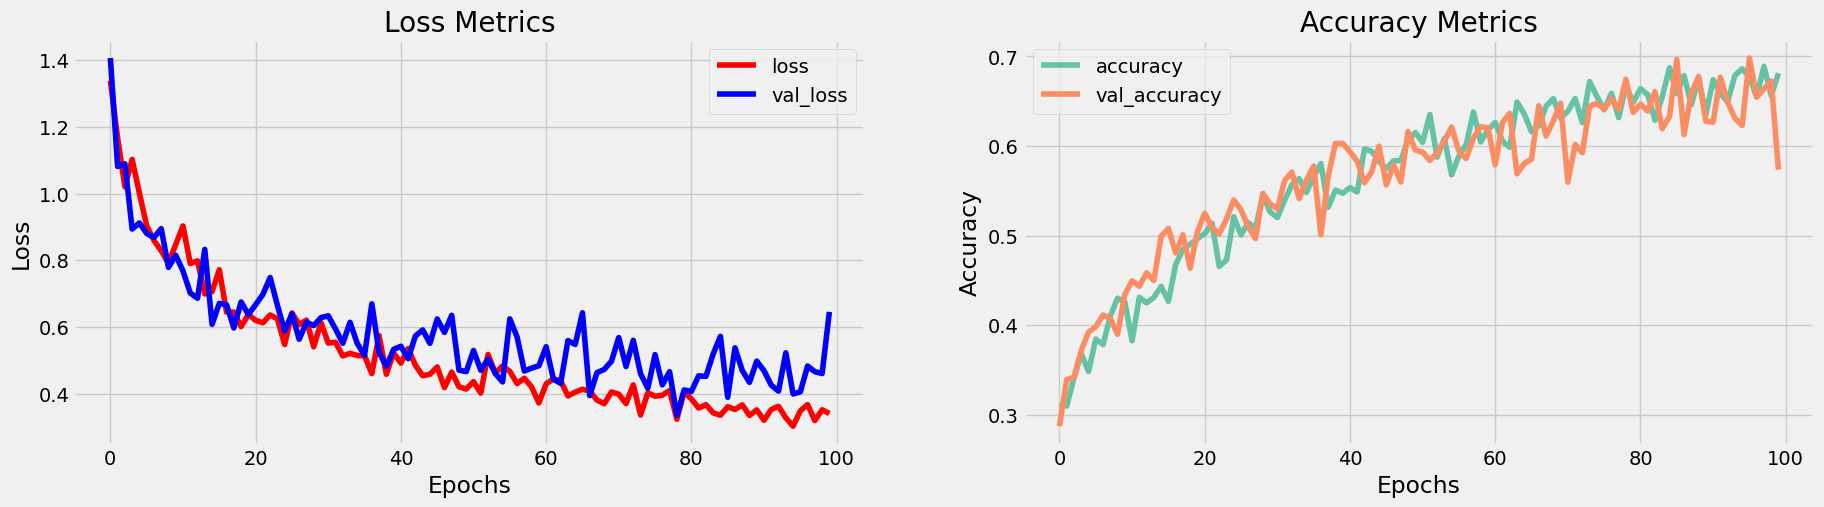

In [24]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax[0].plot(history.history['loss'],label='loss',c='red')
ax[0].plot(history.history['val_loss'],label='val_loss',c = 'blue')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[0].set_title('Loss Metrics')
ax[1].set_title('Accuracy Metrics')
ax[1].plot(history.history['accuracy'],label='accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
ax[0].legend()
ax[1].legend()
plt.show()

In [25]:
model.load_weights('ckpt')
model.save('models',save_format='tf')

In [27]:
for idx,i in enumerate(model.layers):
    print('Encoder layers:' if idx==0 else 'Decoder layers: ')
    for j in i.layers:
        print(j)
    print('---------------------')


Encoder layers:
---------------------
Decoder layers: 
---------------------


In [28]:
class ChatBot(tf.keras.models.Model):
    def __init__(self,base_encoder,base_decoder,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.encoder,self.decoder=self.build_inference_model(base_encoder,base_decoder)

    def build_inference_model(self,base_encoder,base_decoder):
        encoder_inputs=tf.keras.Input(shape=(None,))
        x=base_encoder.layers[0](encoder_inputs)
        x=base_encoder.layers[1](x)
        x,encoder_state_h,encoder_state_c=base_encoder.layers[2](x)
        encoder=tf.keras.models.Model(inputs=encoder_inputs,outputs=[encoder_state_h,encoder_state_c],name='chatbot_encoder')

        decoder_input_state_h=tf.keras.Input(shape=(lstm_cells,))
        decoder_input_state_c=tf.keras.Input(shape=(lstm_cells,))
        decoder_inputs=tf.keras.Input(shape=(None,))
        x=base_decoder.layers[0](decoder_inputs)
        x=base_encoder.layers[1](x)
        x,decoder_state_h,decoder_state_c=base_decoder.layers[2](x,initial_state=[decoder_input_state_h,decoder_input_state_c])
        decoder_outputs=base_decoder.layers[-1](x)
        decoder=tf.keras.models.Model(
            inputs=[decoder_inputs,[decoder_input_state_h,decoder_input_state_c]],
            outputs=[decoder_outputs,[decoder_state_h,decoder_state_c]],name='chatbot_decoder'
        )
        return encoder,decoder

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

    def softmax(self,z):
        return np.exp(z)/sum(np.exp(z))

    def sample(self,conditional_probability,temperature=0.5):
        conditional_probability = np.asarray(conditional_probability).astype("float64")
        conditional_probability = np.log(conditional_probability) / temperature
        reweighted_conditional_probability = self.softmax(conditional_probability)
        probas = np.random.multinomial(1, reweighted_conditional_probability, 1)
        return np.argmax(probas)

    def preprocess(self,text):
        text=clean_text(text)
        seq=np.zeros((1,max_sequence_length),dtype=np.int32)
        for i,word in enumerate(text.split()):
            seq[:,i]=sequences2ids(word).numpy()[0]
        return seq

    def postprocess(self,text):
        text=re.sub(' - ','-',text.lower())
        text=re.sub(' [.] ','. ',text)
        text=re.sub(' [1] ','1',text)
        text=re.sub(' [2] ','2',text)
        text=re.sub(' [3] ','3',text)
        text=re.sub(' [4] ','4',text)
        text=re.sub(' [5] ','5',text)
        text=re.sub(' [6] ','6',text)
        text=re.sub(' [7] ','7',text)
        text=re.sub(' [8] ','8',text)
        text=re.sub(' [9] ','9',text)
        text=re.sub(' [0] ','0',text)
        text=re.sub(' [,] ',', ',text)
        text=re.sub(' [?] ','? ',text)
        text=re.sub(' [!] ','! ',text)
        text=re.sub(' [$] ','$ ',text)
        text=re.sub(' [&] ','& ',text)
        text=re.sub(' [/] ','/ ',text)
        text=re.sub(' [:] ',': ',text)
        text=re.sub(' [;] ','; ',text)
        text=re.sub(' [*] ','* ',text)
        text=re.sub(' [\'] ','\'',text)
        text=re.sub(' [\"] ','\"',text)
        return text

    def call(self,text,config=None):
        input_seq=self.preprocess(text)
        states=self.encoder(input_seq,training=False)
        target_seq=np.zeros((1,1))
        target_seq[:,:]=sequences2ids(['<start>']).numpy()[0][0]
        stop_condition=False
        decoded=[]
        while not stop_condition:
            decoder_outputs,new_states=self.decoder([target_seq,states],training=False)
#             index=tf.argmax(decoder_outputs[:,-1,:],axis=-1).numpy().item()
            index=self.sample(decoder_outputs[0,0,:]).item()
            word=ids2sequences([index])
            if word=='<end> ' or len(decoded)>=max_sequence_length:
                stop_condition=True
            else:
                decoded.append(index)
                target_seq=np.zeros((1,1))
                target_seq[:,:]=index
                states=new_states
        return self.postprocess(ids2sequences(decoded))

chatbot=ChatBot(model.encoder,model.decoder,name='chatbot')
chatbot.summary()

Model: "chatbot_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 encoder_embedding (Embeddi  (None, None, 256)         625408    
 ng)                                                             
                                                                 
 layer_normalization (Layer  (None, None, 256)         512       
 Normalization)                                                  
                                                                 
 encoder_lstm (LSTM)         [(None, None, 256),       525312    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 1151232 (4.39 MB)
Trainable params: 1

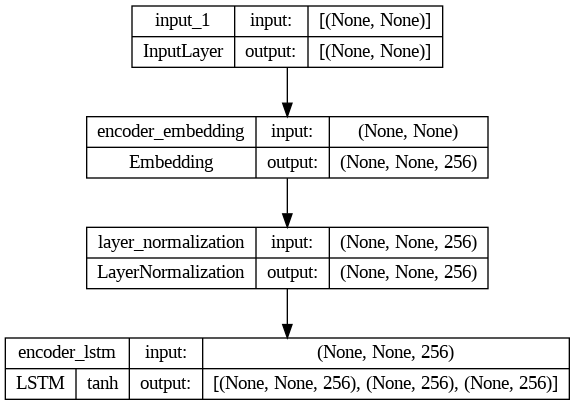

In [29]:
tf.keras.utils.plot_model(chatbot.encoder,to_file='encoder.png',show_shapes=True,show_layer_activations=True)

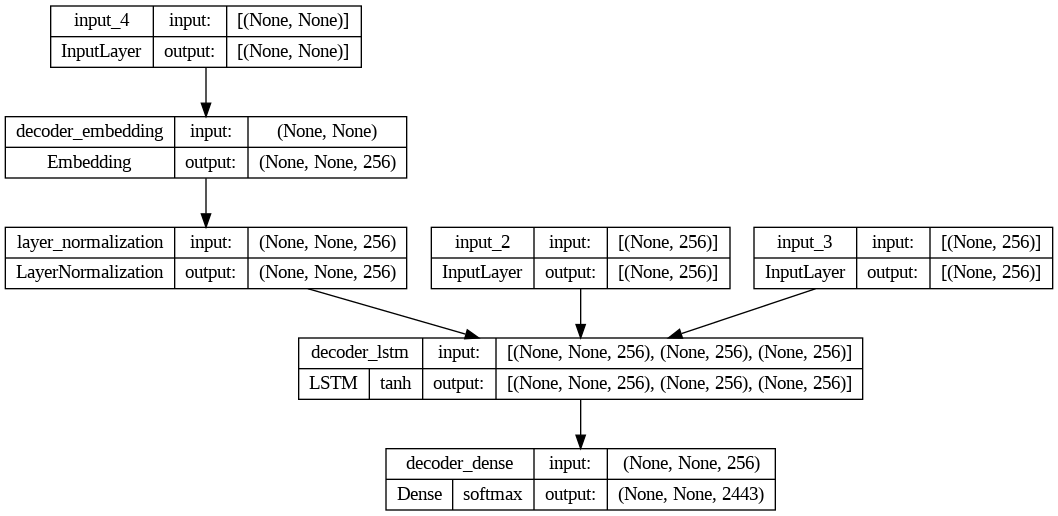

In [30]:
tf.keras.utils.plot_model(chatbot.decoder,to_file='decoder.png',show_shapes=True,show_layer_activations=True)

In [31]:
def print_conversation(texts):
    for text in texts:
        print(f'You: {text}')
        print(f'Bot: {chatbot(text)}')


In [32]:
print_conversation(['hi'])

You: hi
Bot: if the coffee still tastes in the hospital. 


In [33]:
print_conversation(['what is your name'])

You: what is your name
Bot: i got out of the time. 


In [34]:
print_conversation(['who are you'])

You: who are you
Bot: a lot. i'm in school right now. 


In [38]:
Pkl_Filename = "chatbot.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(chatbot, file)